In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_excel('data\Data_Cortex_Nuclear.xls')
df.shape

(1080, 82)

In [5]:
pd.pandas.set_option('display.max_columns',None)
df.dtypes

MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object

In [8]:
##features those have missing values
features_with_mv = []
for feature in df.columns:
    if df[feature].isnull().sum()>1:
        features_with_mv.append(feature)
len(features_with_mv)

49

In [13]:
for i in features_with_mv:
    print(i, np.round(df[i].isnull().sum(),4), '% missing values')

DYRK1A_N 3 % missing values
ITSN1_N 3 % missing values
BDNF_N 3 % missing values
NR1_N 3 % missing values
NR2A_N 3 % missing values
pAKT_N 3 % missing values
pBRAF_N 3 % missing values
pCAMKII_N 3 % missing values
pCREB_N 3 % missing values
pELK_N 3 % missing values
pERK_N 3 % missing values
pJNK_N 3 % missing values
PKCA_N 3 % missing values
pMEK_N 3 % missing values
pNR1_N 3 % missing values
pNR2A_N 3 % missing values
pNR2B_N 3 % missing values
pPKCAB_N 3 % missing values
pRSK_N 3 % missing values
AKT_N 3 % missing values
BRAF_N 3 % missing values
CAMKII_N 3 % missing values
CREB_N 3 % missing values
ELK_N 18 % missing values
ERK_N 3 % missing values
GSK3B_N 3 % missing values
JNK_N 3 % missing values
MEK_N 7 % missing values
TRKA_N 3 % missing values
RSK_N 3 % missing values
APP_N 3 % missing values
Bcatenin_N 18 % missing values
SOD1_N 3 % missing values
MTOR_N 3 % missing values
P38_N 3 % missing values
pMTOR_N 3 % missing values
DSCR1_N 3 % missing values
AMPKA_N 3 % missing valu

In [15]:
##features those have larger missing values
# try to visulize relationship
features_with_lmv = []
for feature in features_with_mv:
    if df[feature].isnull().sum()>70:
        #print(feature)
        features_with_lmv.append(feature)
        

In [9]:
##features those have categorical values
features_with_cv = []
for feature in df.columns:
    if df[feature].dtypes=='O':
        features_with_cv.append(feature)
features_with_cv

['MouseID', 'Genotype', 'Treatment', 'Behavior', 'class']

In [18]:
for feature in features_with_cv:
    print(feature,'have {} categories'.format(len(df[feature].unique())))

MouseID have 1080 categories
Genotype have 2 categories
Treatment have 2 categories
Behavior have 2 categories
class have 8 categories


In [19]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))


Number of numerical variables:  77


In [21]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


In [ ]:
df.boxplot(column='DYRK1A_N', by ='class')
plt.title('Protein DYRK1A_N by class')
plt.rcParams.update({'font.size': 12})
plt.suptitle("")
plt.show()

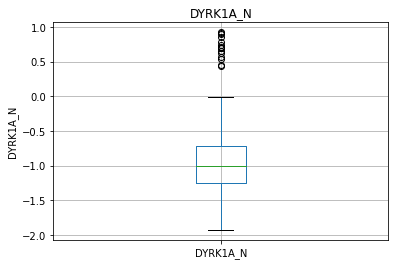

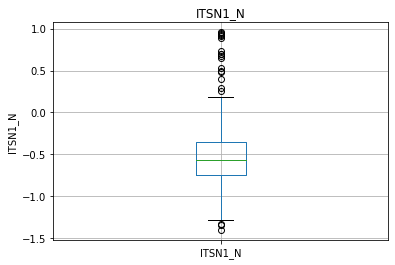

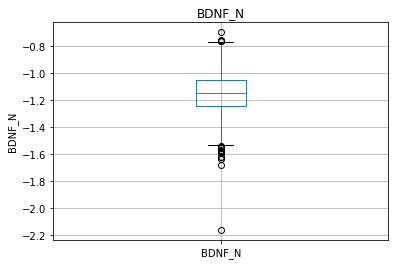

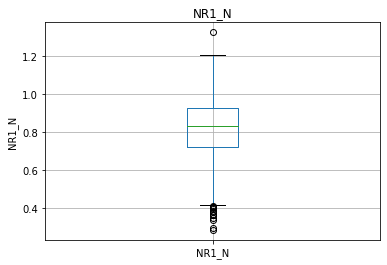

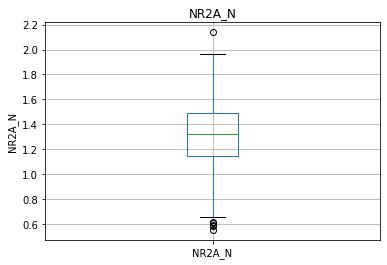

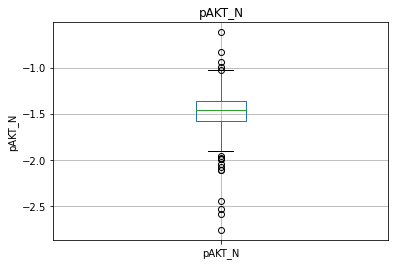

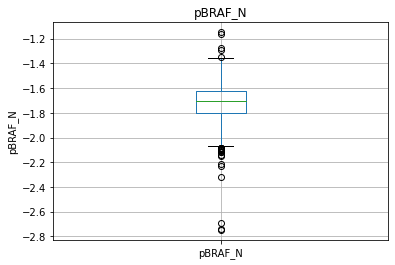

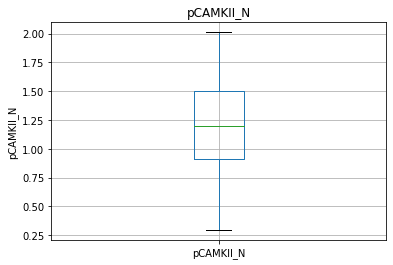

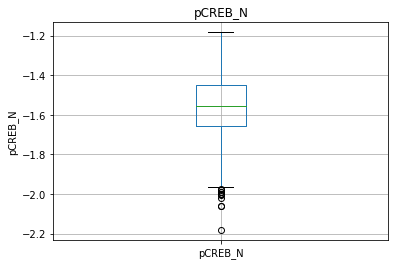

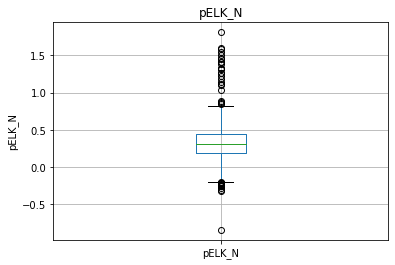

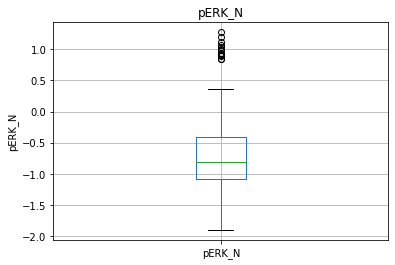

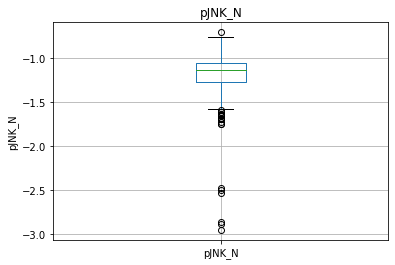

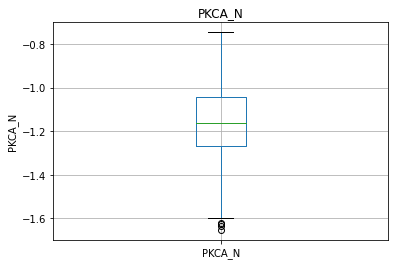

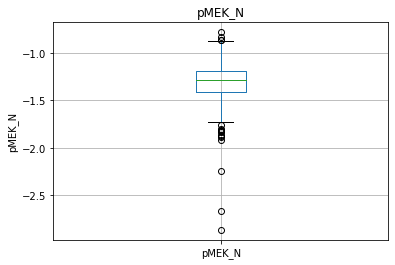

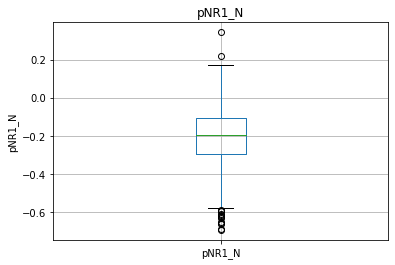

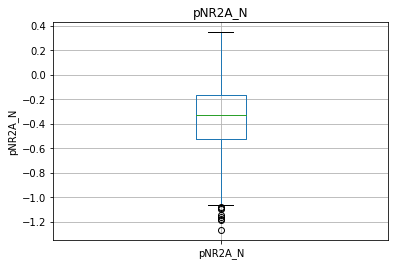

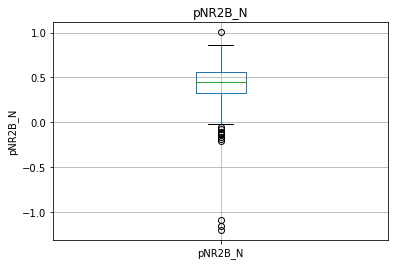

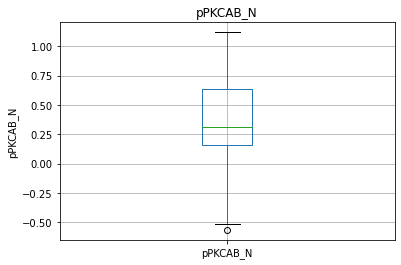

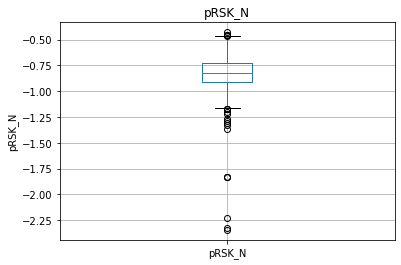

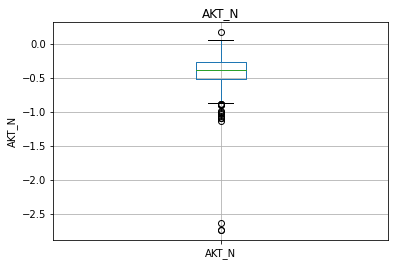

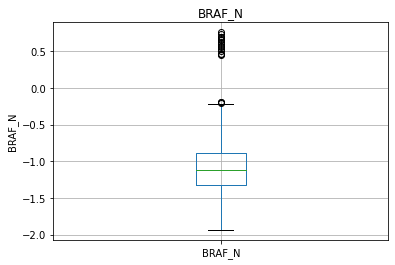

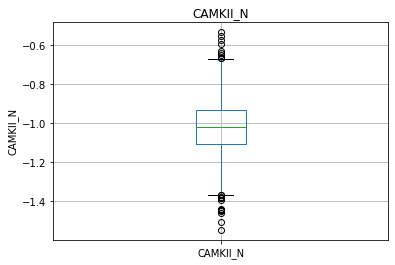

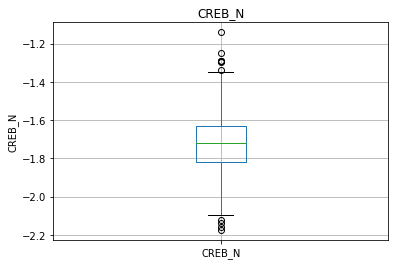

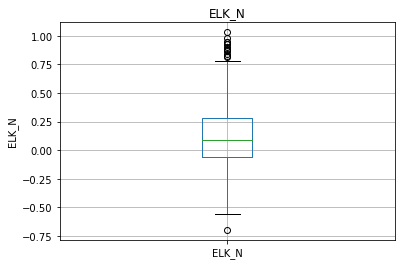

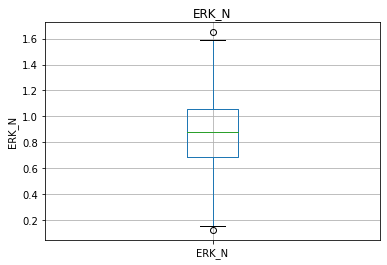

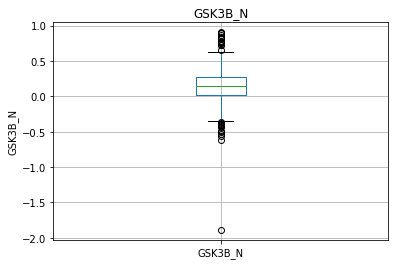

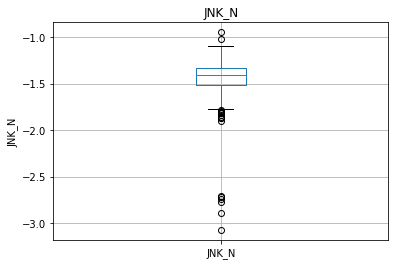

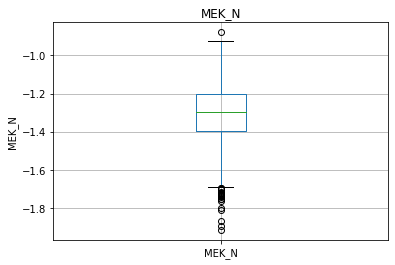

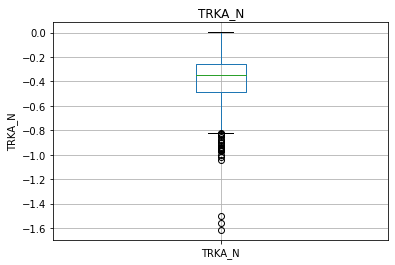

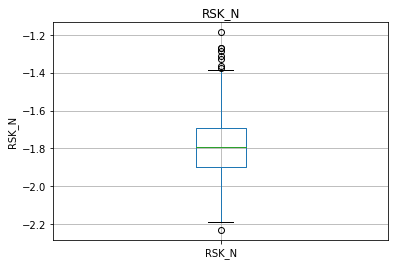

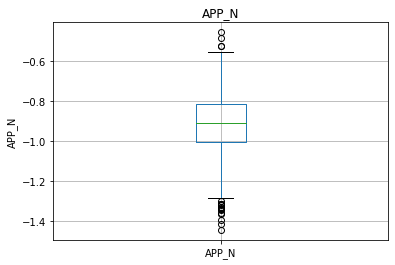

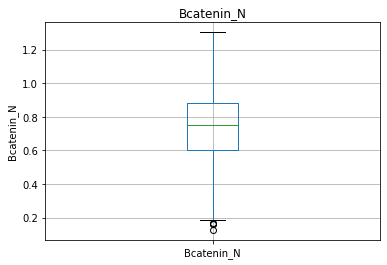

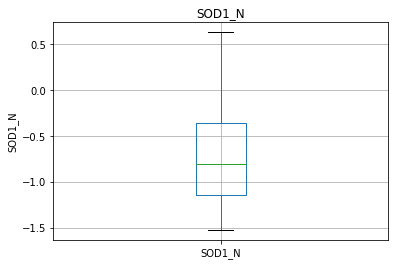

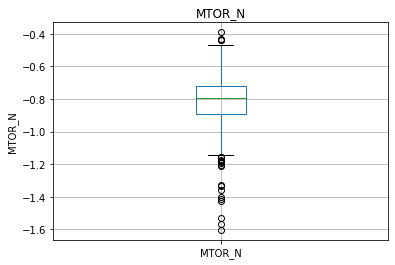

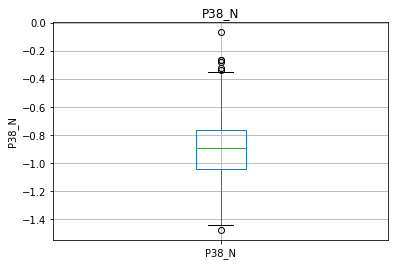

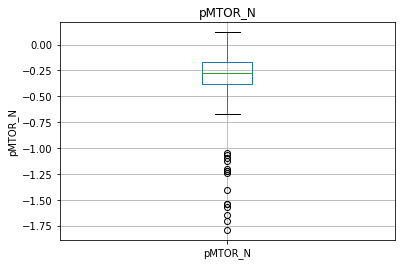

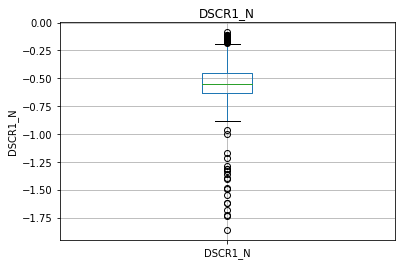

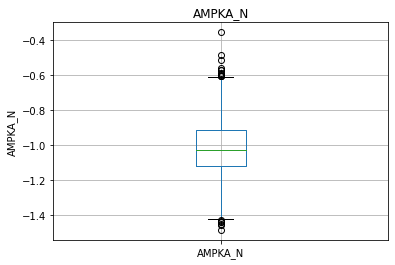

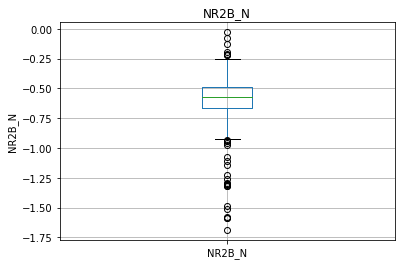

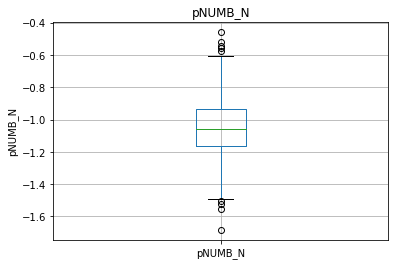

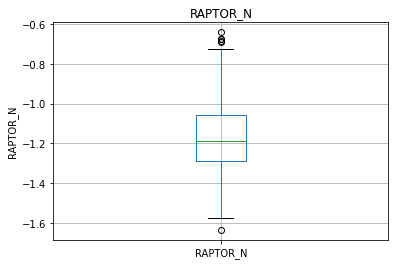

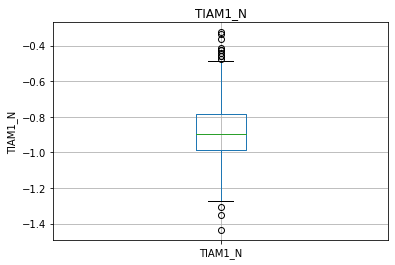

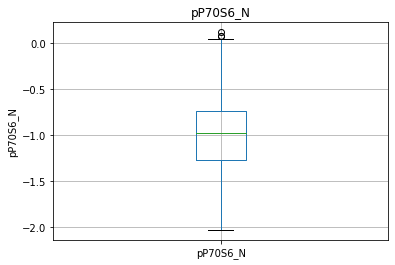

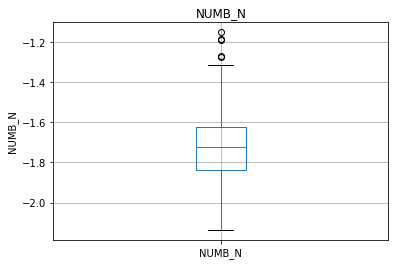

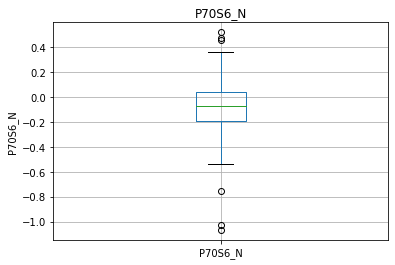

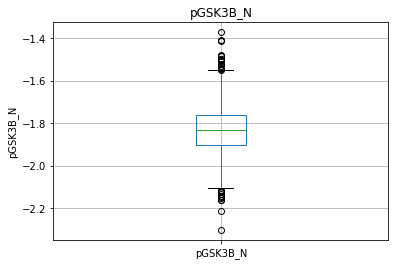

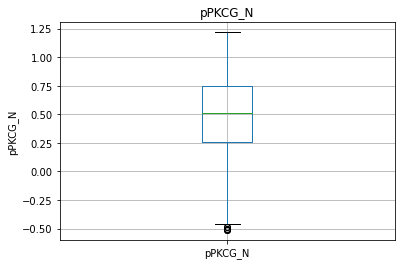

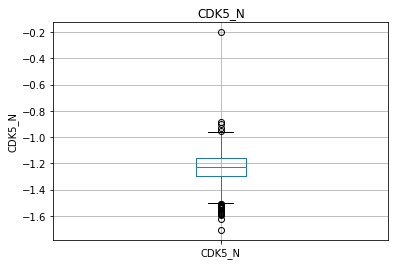

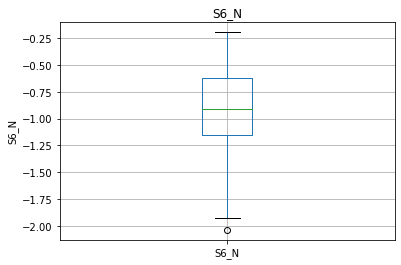

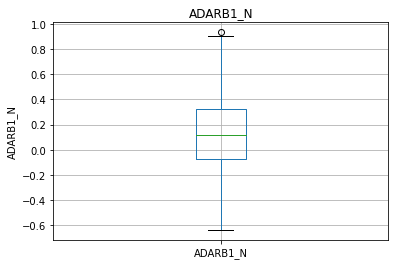

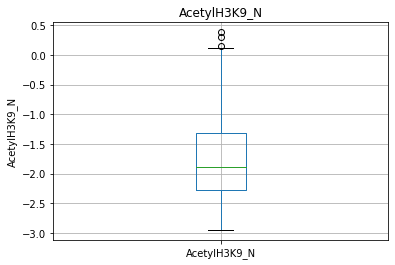

C:\Users\PANCHAL\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


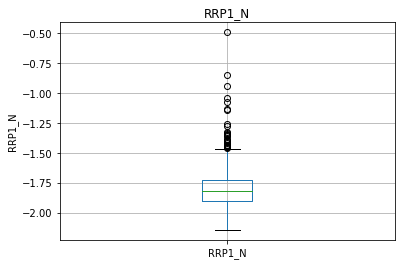

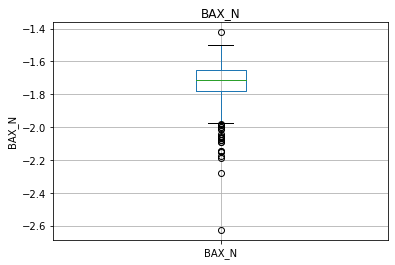

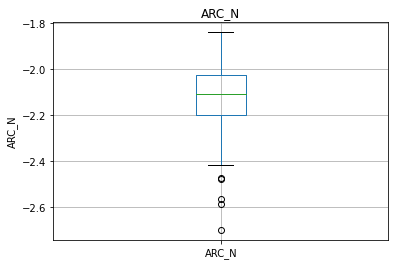

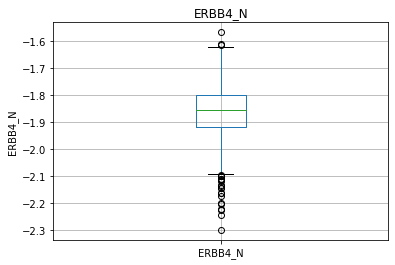

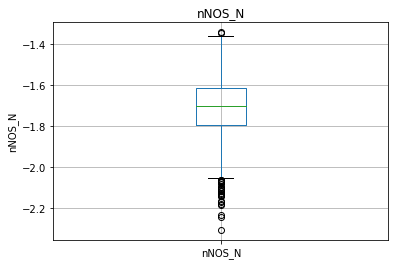

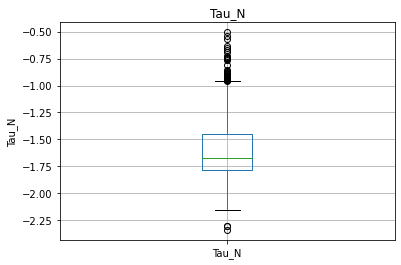

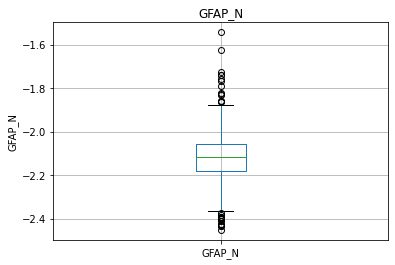

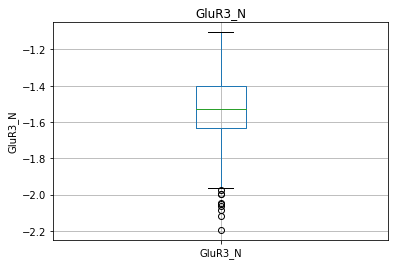

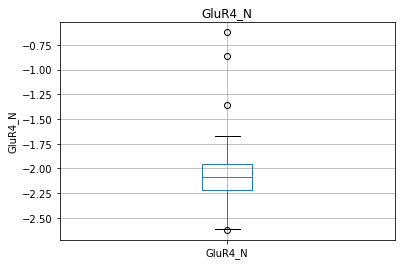

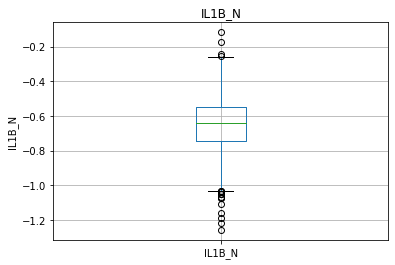

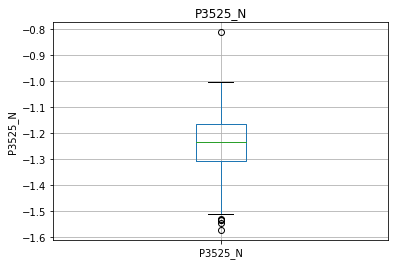

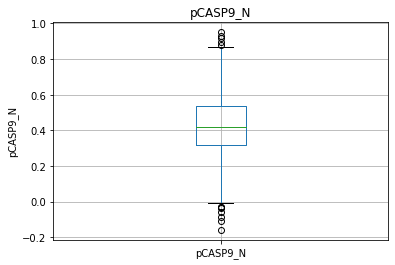

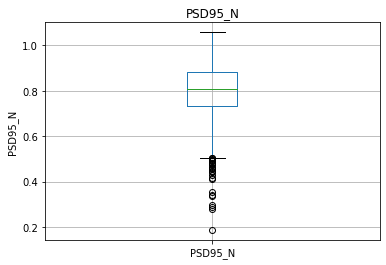

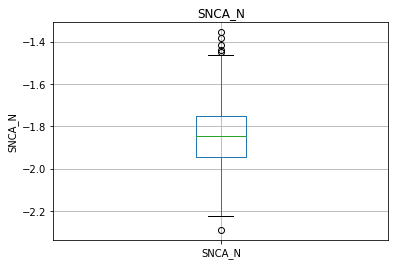

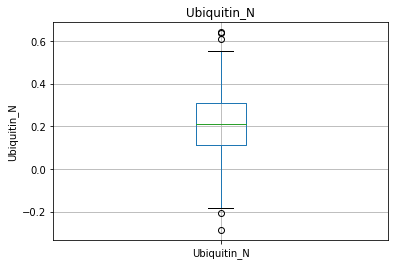

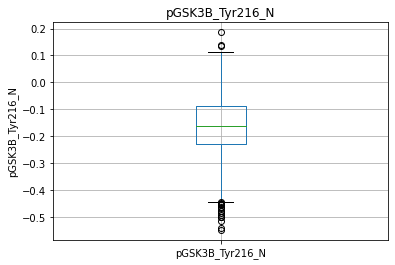

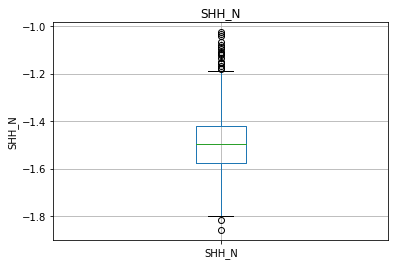

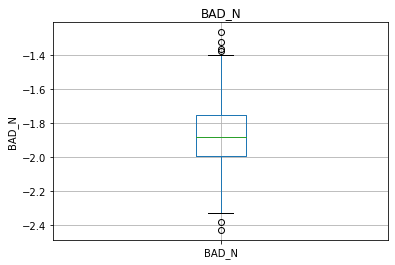

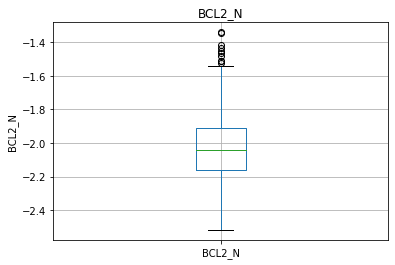

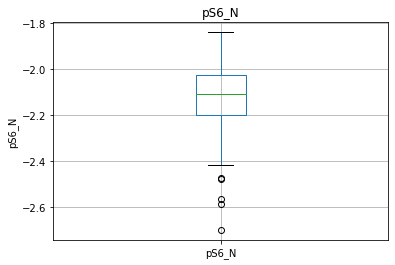

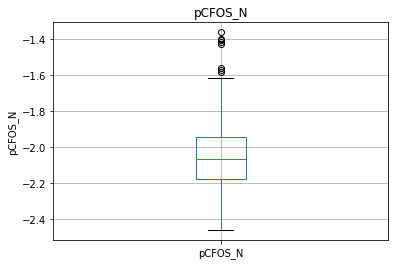

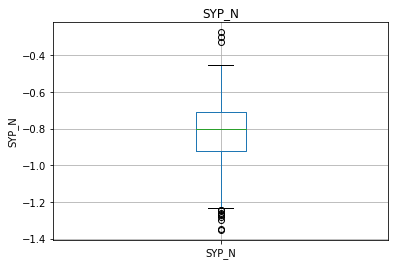

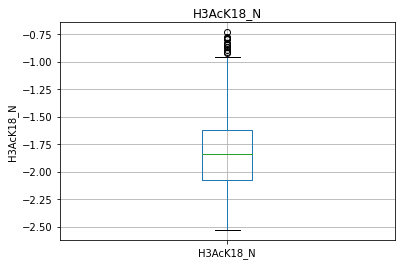

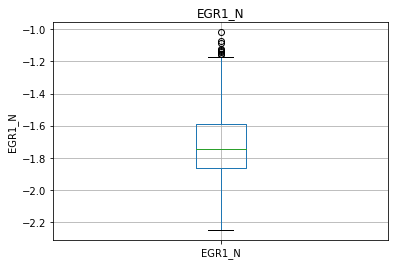

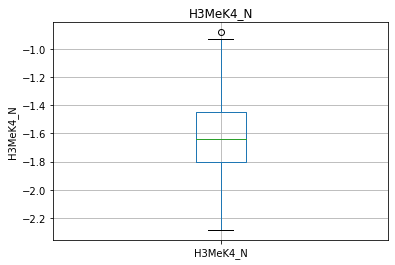

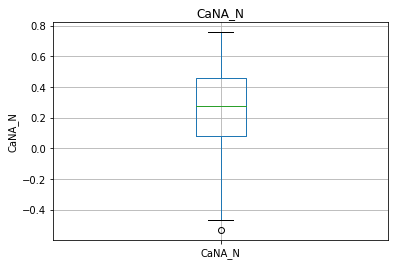

In [22]:
##outliers
for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()